In [1]:
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [15]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

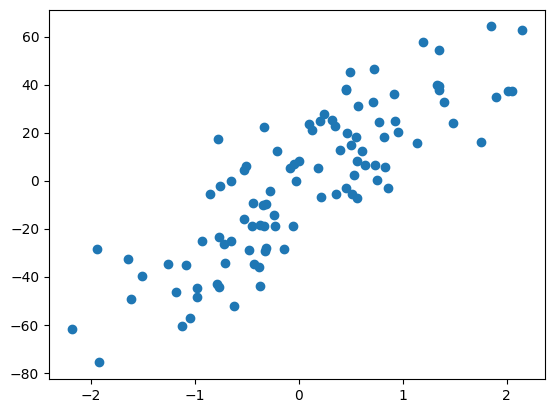

In [16]:
plt.scatter(X,y)

In [5]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

C:\Users\bramh\anaconda3\envs\ml\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


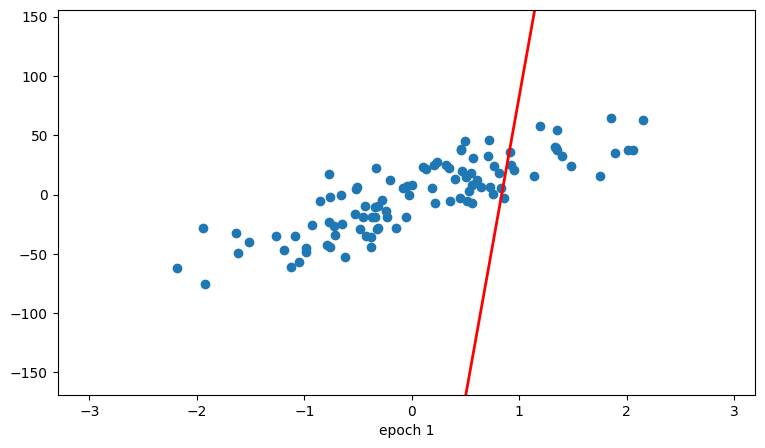

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)

ax.scatter(X, y)

line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = f'epoch {i + 1}'
    line.set_ydata(x_i * all_m[i] + all_b[i])
    ax.set_xlabel(label)
    return line,

anim = FuncAnimation(
    fig,
    update,
    frames=epochs,
    interval=500,
    repeat=True
)

HTML(anim.to_jshtml())


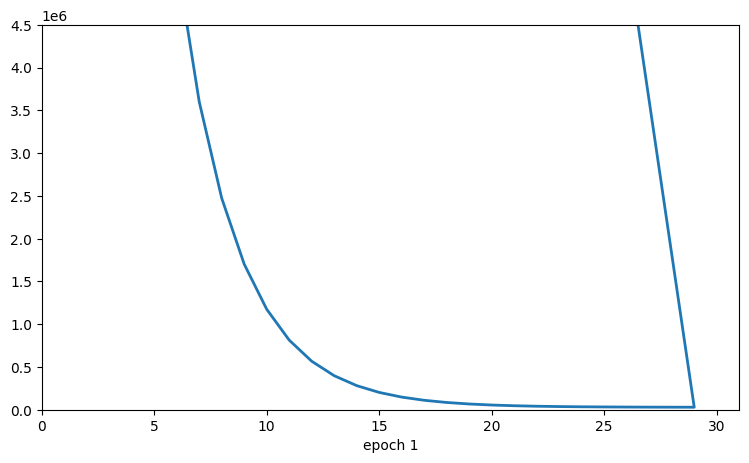

In [8]:
# Cost function
# creating a blank window 
# for the animation 
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

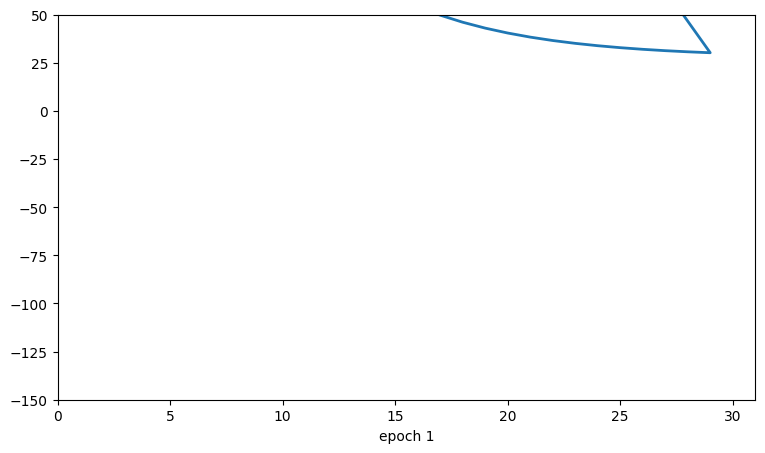

In [9]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 50)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_m[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation7.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)